In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from utils import *

Generating data and splitting it into train, test and CV data sets.

In [2]:
X, y, centers, classes, std = gen_blobs()
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.20, random_state=1)

print(f'X_train.shape: {X_train.shape}\nX_cv.shape: {X_cv.shape}\nX_test.shape: {X_test.shape}')

X_train.shape: (400, 2)
X_cv.shape: (320, 2)
X_test.shape: (80, 2)


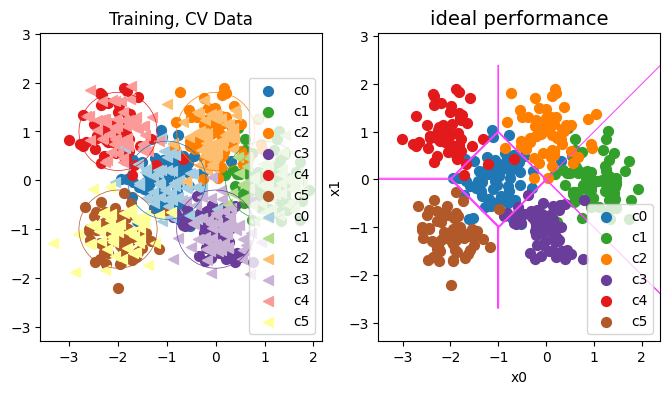

In [3]:
plt_blobs_ideal(X_train, y_train, classes, X_cv, y_cv, centers, std)

'Complex' model without regularization.

In [42]:
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(units=120, activation='relu'),
        Dense(units=40, activation='relu'),
        Dense(units=20, activation='relu'),
        Dense(units=6, activation='linear')
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [43]:
model.fit(
    X_train, y_train,
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.1487
Epoch 2/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.4056
Epoch 3/1000
13/13 [==============================] - 0s 917us/step - loss: 0.3632
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3037
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3093
Epoch 6/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.3223
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2609
Epoch 8/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.2434
Epoch 9/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2275
Epoch 10/1000
13/13 [==============================] - 0s 917us/step - loss: 0.2184
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.2520
Epoch 12/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2144
Epoch 13/10

In [46]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 120)               360       
                                                                 
 dense_36 (Dense)            (None, 40)                4840      
                                                                 
 dense_37 (Dense)            (None, 20)                820       
                                                                 
 dense_38 (Dense)            (None, 6)                 126       
                                                                 
Total params: 6146 (24.01 KB)
Trainable params: 6146 (24.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 569us/step


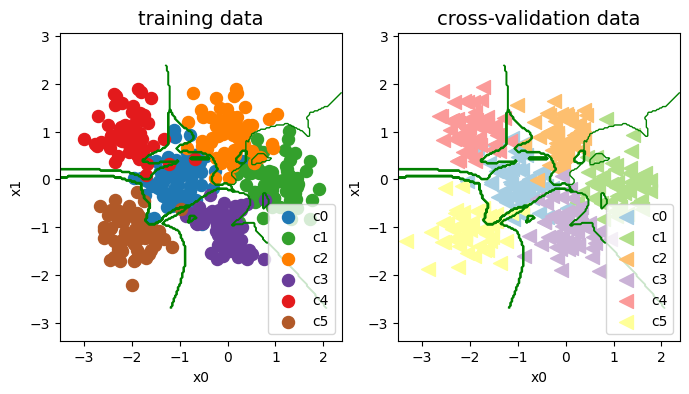

In [47]:
model_predict = lambda Xl: np.argmax(tf.nn.softmax(model.predict(Xl)).numpy(),axis=1)
plt_nn(model_predict,X_train,y_train, classes, X_cv, y_cv)

Lovecraftian looking overfit

In [48]:
training_cerr_complex = eval_cat_err(y_train, model_predict(X_train))
cv_cerr_complex = eval_cat_err(y_cv, model_predict(X_cv))
print(f"categorization error, training, complex model: {training_cerr_complex:0.3f}")
print(f"categorization error, cv,       complex model: {cv_cerr_complex:0.3f}")

10/10 [==============================] - 0s 556us/step
categorization error, training, complex model: 0.013
categorization error, cv,       complex model: 0.103


Simpler model.


In [49]:
tf.random.set_seed(1234)
model_s = Sequential(
    [
        Dense(units=6, activation='relu'),
        Dense(units=5, activation='relu'),
        Dense(units=6, activation='linear')

    ]
)

model_s.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [50]:
model_s.fit(
    X_train, y_train, 
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1000us/step - loss: 1.6592
Epoch 2/1000
13/13 [==============================] - 0s 750us/step - loss: 1.4839
Epoch 3/1000
13/13 [==============================] - 0s 833us/step - loss: 1.2729
Epoch 4/1000
13/13 [==============================] - 0s 833us/step - loss: 1.0193
Epoch 5/1000
13/13 [==============================] - 0s 750us/step - loss: 0.7888
Epoch 6/1000
13/13 [==============================] - 0s 750us/step - loss: 0.6082
Epoch 7/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4916
Epoch 8/1000
13/13 [==============================] - 0s 833us/step - loss: 0.4013
Epoch 9/1000
13/13 [==============================] - 0s 916us/step - loss: 0.3439
Epoch 10/1000
13/13 [==============================] - 0s 833us/step - loss: 0.3048
Epoch 11/1000
13/13 [==============================] - 0s 833us/step - loss: 0.2679
Epoch 12/1000
13/13 [==============================] - 0s 750us/step - loss: 0.2592


In [51]:
model_s.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 6)                 18        
                                                                 
 dense_40 (Dense)            (None, 5)                 35        
                                                                 
 dense_41 (Dense)            (None, 6)                 36        
                                                                 
Total params: 89 (356.00 Byte)
Trainable params: 89 (356.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 573us/step


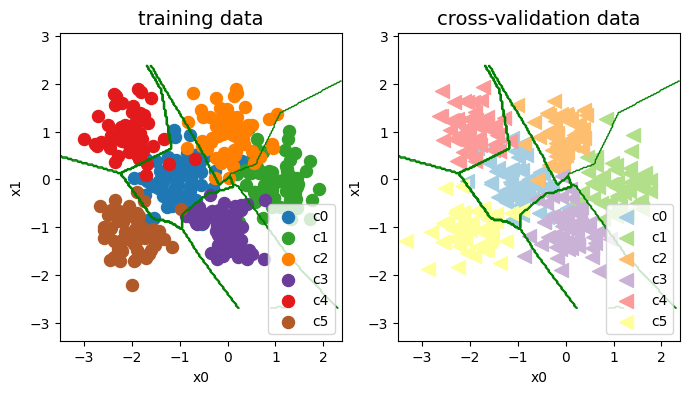

In [52]:
model_predict_s = lambda Xb: np.argmax(tf.nn.softmax(model_s.predict(Xb)).numpy(), axis=1)
plt_nn(model_predict_s,X_train,y_train, classes, X_cv, y_cv)

Bettah

In [53]:
training_cerr_simple = eval_cat_err(y_train, model_predict_s(X_train))
cv_cerr_simple = eval_cat_err(y_cv, model_predict_s(X_cv))
print(f"categorization error, training, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

10/10 [==============================] - 0s 777us/step
categorization error, training, simple model, 0.065, complex model: 0.013
categorization error, cv,       simple model, 0.069, complex model: 0.103


Now lets add regularization

In [54]:

tf.random.set_seed(1234)
model_r = Sequential(
    [
        Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=6, activation='linear')
    ]
)
model_r.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [55]:
model_r.fit(
    X_train, y_train, 
    epochs=1000
)

Epoch 1/1000
13/13 [==============================] - 0s 1ms/step - loss: 4.4894
Epoch 2/1000
13/13 [==============================] - 0s 1000us/step - loss: 1.6771
Epoch 3/1000
13/13 [==============================] - 0s 1000us/step - loss: 1.3039
Epoch 4/1000
13/13 [==============================] - 0s 1ms/step - loss: 1.0546
Epoch 5/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9655
Epoch 6/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.9346
Epoch 7/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.9127
Epoch 8/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.8571
Epoch 9/1000
13/13 [==============================] - 0s 1000us/step - loss: 0.7978
Epoch 10/1000
13/13 [==============================] - 0s 916us/step - loss: 0.7658
Epoch 11/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7459
Epoch 12/1000
13/13 [==============================] - 0s 1ms/step - loss: 0.7428
Epoch 13

In [56]:
model_r.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 120)               360       
                                                                 
 dense_43 (Dense)            (None, 40)                4840      
                                                                 
 dense_44 (Dense)            (None, 6)                 246       
                                                                 
Total params: 5446 (21.27 KB)
Trainable params: 5446 (21.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1082/1082 [==============================] - 1s 616us/step


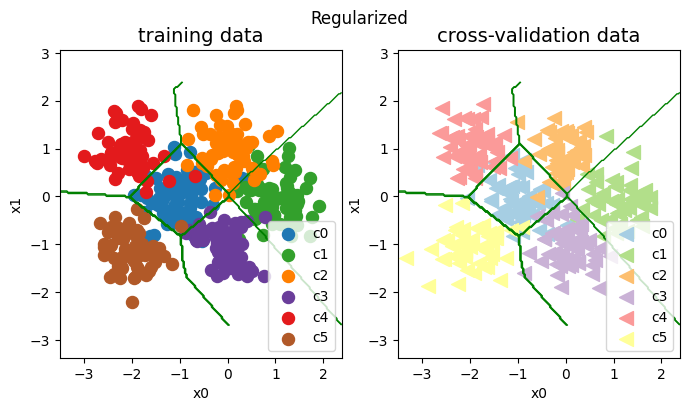

In [57]:
model_predict_r = lambda Xl: np.argmax(tf.nn.softmax(model_r.predict(Xl)).numpy(),axis=1)
 
plt_nn(model_predict_r, X_train,y_train, classes, X_cv, y_cv, suptitle="Regularized")

Pretty good, close to ideal

In [58]:
training_cerr_reg = eval_cat_err(y_train, model_predict_r(X_train))
cv_cerr_reg = eval_cat_err(y_cv, model_predict_r(X_cv))
test_cerr_reg = eval_cat_err(y_test, model_predict_r(X_test))
print(f"categorization error, training, regularized: {training_cerr_reg:0.3f}, simple model, {training_cerr_simple:0.3f}, complex model: {training_cerr_complex:0.3f}" )
print(f"categorization error, cv,       regularized: {cv_cerr_reg:0.3f}, simple model, {cv_cerr_simple:0.3f}, complex model: {cv_cerr_complex:0.3f}" )

3/3 [==============================] - 0s 1ms/step
categorization error, training, regularized: 0.070, simple model, 0.065, complex model: 0.013
categorization error, cv,       regularized: 0.069, simple model, 0.069, complex model: 0.103


Now lets iterate through few lambdas to find the most optimal one

In [ ]:
tf.random.set_seed(1234)
lambdas = [0.0, 0.001, 0.01, 0.1, 0.2, 0.3]
num_lambdas = len(lambdas)
models = [None] * num_lambdas

for i in num_lambdas:
    lambda_ = lambdas[i]
    models[i] = Sequential(
        [
            Dense(120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(classes, activation='linear')
        ]
    )
    models[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.01)
    )